In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import algorithms.areamanager
%matplotlib inline

In [2]:
# Check-ins sequenciais

def string_to_array(string):
    if string == '':
        return list()
    return eval(string)
df_city_checkin=pd.read_csv("../data/checkin/lasvegas.csv",converters={'categories':string_to_array})
df_city_checkin.sort_values(by=['user_id','date'],inplace=True)
series_city_user=df_city_checkin['user_id'].drop_duplicates().reset_index(drop=True)
df_city_checkin.head()

,user_id,business_id,date,latitude,longitude,categories,subarea_id
237970,---1lKK3aKOuomHnwAkAow,5cbsjFtrntUAeUx51FaFTg,2008-11-11 04:31:46,36.160854,-115.331527,[Mexican],602.0
207138,---1lKK3aKOuomHnwAkAow,ifEHr-ZnGFSKgJVsywiAFg,2009-01-16 21:49:36,36.160224,-115.291511,"[Wineries, Italian, Bars, Wine Bars, Seafood]",595.0
133863,---1lKK3aKOuomHnwAkAow,kosTPb88O4Q0XGbVbEOGCA,2010-10-16 23:27:02,36.145053,-115.232838,[Thai],309.0
31937,---1lKK3aKOuomHnwAkAow,rq5dgoksPHkJwJNQKlGQ7w,2010-10-16 23:31:28,36.164180,-115.289630,"[Breakfast & Brunch, Coffee & Tea, American (N...",595.0
178307,---1lKK3aKOuomHnwAkAow,2BbFeotL85cIaBjSq1SWiA,2010-10-17 04:19:01,36.168099,-115.192230,[American (New)],646.0


In [3]:
df_user_mean_seq_km_visited= pd.DataFrame(columns=['user_id','mean_seq_dist_km','std_seq_dist_km'])
def haversine(lat1,lon1, lat2, lon2):
    # deg to rad
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2-lon1
    dlat = lat2-lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    c = 2*np.arcsin(np.sqrt(a))
    r = 6371 # km
    return c*r
i=0
for user_id in series_city_user:
    
    # Choose one user
    
    df_user_checkin=df_city_checkin[df_city_checkin['user_id']==user_id].reset_index(drop=True)
        
    df_user_checkin[['latitude','longitude']].drop(df_user_checkin.tail(1).index).reset_index(drop=True).tail()
    
    df_user_checkin[['latitude','longitude']].drop(df_user_checkin.head(1).index).reset_index(drop=True).tail()
    
    df_tmp=df_user_checkin[['latitude','longitude']].drop(df_user_checkin.head(1).index).reset_index(drop=True)
    df_tmp=df_tmp.join(df_user_checkin[['latitude','longitude']].drop(df_user_checkin.tail(1).index).reset_index(drop=True),rsuffix='_next')
    dists=df_tmp.apply(lambda locations: haversine(*locations),axis=1)
    mean_seq_dist_km=dists.mean()
    std_seq_dist_km=dists.std()
    
    
    
    
    df_user_mean_seq_km_visited=df_user_mean_seq_km_visited.append({'user_id':user_id,'mean_seq_dist_km':mean_seq_dist_km,'std_seq_dist_km':std_seq_dist_km},ignore_index=True)
    if i%1000==0:
        print(i)
    i=i+1
    
df_user_mean_seq_km_visited.head()

0
1000
2000
3000
4000
5000
6000


,user_id,mean_seq_dist_km,std_seq_dist_km
0,---1lKK3aKOuomHnwAkAow,7.869527,5.467270
1,--RlSfc-QmcHFGHyX6aVjA,4.291019,4.036746
2,-0HhZbPBlB1YZx3BhAfaEA,7.801927,5.554867
3,-1x8gXJnrI-FeZPNvnfbRg,4.579563,3.970821
4,-267Yx8RmdP6io2-qI4UcQ,8.797991,5.430945


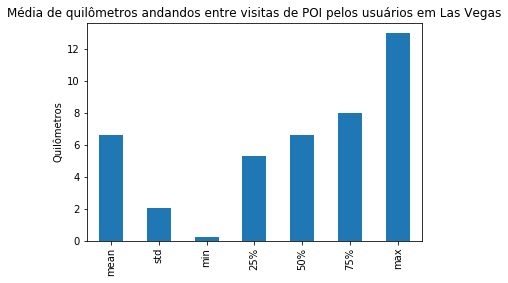

In [4]:
p=df_user_mean_seq_km_visited['mean_seq_dist_km'].describe().drop('count').plot.bar(title='Média de quilômetros andandos entre visitas de POI pelos usuários em Las Vegas')
p.set_ylabel("Quilômetros")
p

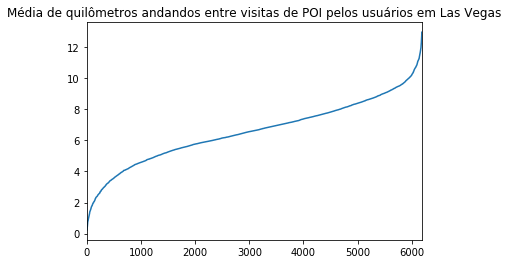

In [13]:
df_user_mean_seq_km_visited['mean_seq_dist_km'].sort_values().reset_index(drop=True).plot(title='Média de quilômetros andandos entre visitas de POI pelos usuários em Las Vegas')

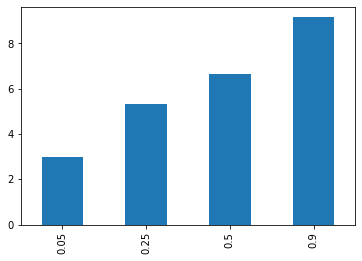

In [28]:
df_user_mean_seq_km_visited['mean_seq_dist_km'].sort_values().reset_index(drop=True).quantile([0.05, 0.25, 0.5, 0.9]).plot.bar()